In [1]:
import numpy as np
import matplotlib.pyplot as plt

from fmm_data_generator_3d import create_dataset

import os
import sys

os.chdir('..')
os.chdir('dataset')



In [2]:
maps = np.load("occupancymap.npy", allow_pickle=True)
sdf = np.load("sdf.npy", allow_pickle=True)


train_trial = 30
test_trial = 5

env_size = 121

travel_time_values_array_train, signed_distance_array_train, velocity_matrices_array_train, goals_train = create_dataset(maps=maps[:train_trial,:,:,:], sdf=sdf[:train_trial,:,:,:],num_trials=train_trial, goal_trials=10, env_size=env_size,erosion_trials = 1)
travel_time_values_array_test,  signed_distance_array_test,  velocity_matrices_array_test,  goals_test =  create_dataset(maps=maps[train_trial:,:,:,:], sdf=sdf[train_trial:,:,:,:], num_trials=test_trial,  goal_trials=10, env_size=env_size,erosion_trials = 1)

100%|██████████| 5/5 [00:33<00:00,  6.78s/it]


In [3]:
np.save("/mountvol/dataset-121-sdf/goals.npy",np.concatenate((goals_train,goals_test), axis=0))

# Save velocity_matrices_array as "mask.npy"
np.save("/mountvol/dataset-121-sdf/mask.npy", np.concatenate((velocity_matrices_array_train,velocity_matrices_array_test), axis=0))

# Save travel_time_values_array as "output.npy"
np.save("/mountvol/dataset-121-sdf/output.npy", np.concatenate((travel_time_values_array_train,travel_time_values_array_test), axis=0))

# Save signed_distance_array as "dist_in.npy"
np.save("/mountvol/dataset-121-sdf/dist_in.npy", np.concatenate((signed_distance_array_train,signed_distance_array_test),axis=0))

In [2]:
sdf = np.load('/mountvol/dataset-121-sdf/dist_in.npy')
sdf2 = np.load('/mountvol/dataset-121-hres/dist_in.npy')

mask = np.load('/mountvol/dataset-121-sdf/mask.npy')
output = np.load('/mountvol/dataset-121-sdf/output.npy')

In [3]:
goal = np.load('/mountvol/dataset-121-sdf/goals.npy')

In [11]:
map = 330
z = 14

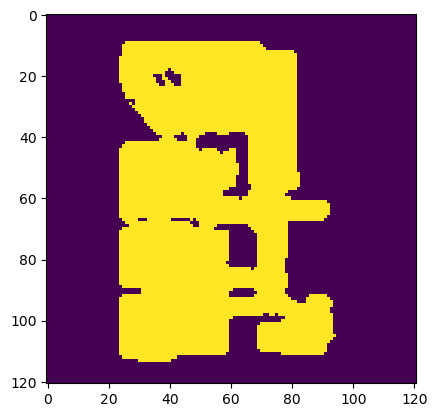

In [12]:
plt.imshow(mask[map,:,:,z])

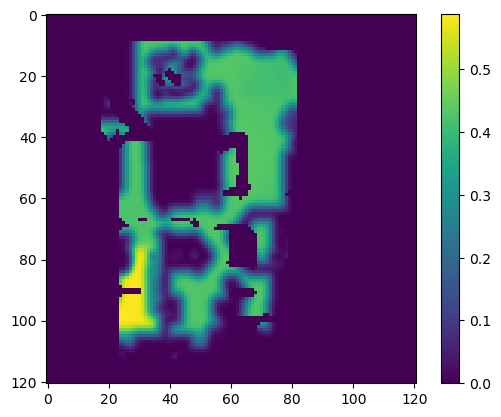

In [13]:
plt.imshow(sdf2[map,:,:,z])
plt.colorbar()

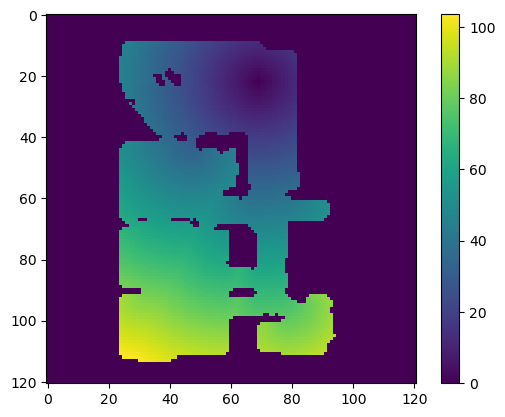

In [14]:
plt.imshow(output[map,:,:,z])
plt.colorbar()

In [10]:
goal[map,:]

array([22., 69., 14.])